# Sheet 8
To be handed in until June 19th, 18:00.

In [83]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_genlaguerre
from scipy.optimize import curve_fit

from IPython.core.display import SVG

pi = np.pi

In [8]:
import qutip as q

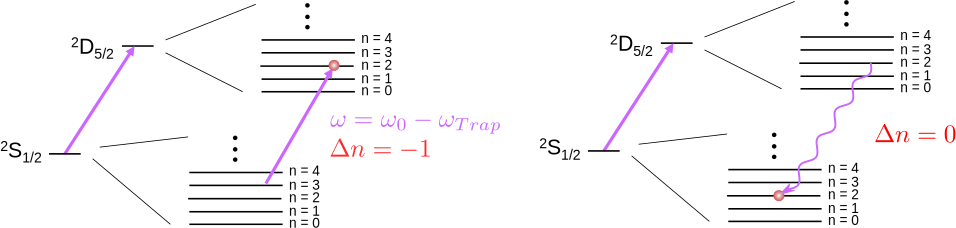

In [33]:
SVG(filename='sideband_cooling_scheme.svg')

$$\newcommand{\bra}[1]{\left\langle\,{#1}\,\right|}
\newcommand{\ket}[1]{\left|\,{#1}\,\right\rangle}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
# Resolved Sideband Cooling
A two-level ion trapped in a Paul trap has an electronic degree of freedom ($\ket{g}, \ket{e}$) and a motional degree of freedom (harmonic oscillator states $\ket{n}$). Light fields can be used to couple these DOFs. In the special case when the spacing between the harmonic oscillator states is larger than the linewidth of the driving laser (resolved sidebands) and the ion can emmit photons without changing its motional state (Lamb-Dicke parameter $\eta \ll 1$), the coupling can be used to cool the ion well below the Doppler limit. The idea is ilustrated in the figure above. The ion is continuosly driven on the red sideband, where the driving laser is detuned one trap frequency to the red. You have derived in the lecture that this interaction can be expressed by the red sideband Hamiltonian

\begin{align*}
H_{int}^{RSB} = \frac{1}{2}\,\Omega \, \eta \, \left( a \,\sigma_+ \, + \, a^\dagger \, \sigma_- \right)\, ,
\end{align*}

where $a / a^\dagger$ are the annihilation/creation operators of the harmonic oscillator and $\sigma_- / \sigma_+$ are the operators of electronic de-/excitation. The ion will undergo Rabi cycles between the two states

\begin{align*}
\ket{g}\ket{n} \leftrightarrow \ket{e}\ket{n-1}\,.
\end{align*}

## 1) Driving a thermal state with resolved sidebands
Assume an initial thermal distribution with density matrix $\ket{g}\ket{n_{th}}\bra{n_{th}}\bra{g}$, i.e. a system that is in the electronic ground state but whose harmonic oscillator states are a thermal mixture of states. This thermal mixture is characterized by a Boltzmann distribution with $\overline n = 10$ and off-diagonal density matrix elements that are $0$. The system is driven by a laser with rabi frequency $\Omega = 2 \pi\, \times\, 220\,\text{kHz}$ and has a Lamb-Dicke parameter of $\eta = 0.1$. 

**a)** *(6 Points)* Simulate the system, taking into account the first $50$ fock states, for a duration of $T = 40\, /\, (\Omega\,\eta)$. Assume that spontaneous emission is negligible. Plot the time evolution of the probability of finding the system in the excited state $P_e$ as well as the expecation value of $\hat N = a^\dagger a$. Also plot the initial and final distribution of fock states (regardless of the electronic state). Do you observe a cooling rate or not? Why?

### Some hints on how to properly treat the problem using qutip
* `qutip` has a method to create density matrices for thermal states: `qutip.thermal_dm(N_fock, n_bar)`
* Tensor states such as $\ket{g}\ket{n}$ can be created using `qutip.tensor(psi_n, psi_g)`. This also works if both states are given as density matrices. 
* Operators acting on those tensor states are implemented in a similar manner. E.g. the operator $a$ which destroys a Fock state but leaves the electronic DOF invariant would be `qutip.tensor(qutip.destroy(N_fock), qutip.qeye(2))` (acting on the state above).
* To obtain the distribution of a sub-ensemble of states $A$ from a composite density matrix $\rho$, you need to take the partial trace
\begin{align*}
    tr_A(\rho) = \sum_i \bra{a_i} \, \rho \, \ket{a_i}
\end{align*}
`qutip` density matrix elements have a method `.ptrace()` for this task.

**b)** *(3 Points)* For the above system now assume that spontaneous decay of the excited electronic state occurs with a rate of $\Gamma = \eta \,\Omega$. Create the same plots as in a). What are your observations regarding the cooling?

## 2) Blue Sideband Thermometry
Being able to resolve the trap sidebands also enables the experimentalist to reconstruct the Fock state distribution of a quantum system. As you have seen in 1a), coherent driving of the system leads to a superposition of oscillations with different Rabi frequencies. The Rabi rate of the blue-sideband transition $\ket{g}\ket{n} \leftrightarrow \ket{e}\ket{n+1}$ is given by

\begin{align*}
    \Omega_{n, n+1} = \eta\,\Omega_0 \, e^{-\eta^2 \,/\, 2}\, \sqrt{\frac{1}{n+1}}\, L^1_n(\eta^2)\,.
\end{align*}

Here $ L^\alpha_n(x)$ are the generalized Laguerre polynomials (see `scipy.special.eval_genlaguerre`).
This means that for a system, initially in the ground state, the probability to find it in the ground state at time $t$ is

\begin{align*}
    P_g(t) = \frac{1}{2}  \, \left(  1 + e^{-\Gamma_{dec}\, t}\sum_n \, P_n \cos \left(\, \Omega_{n, n+1}\, t \right) \right)\, ,
\end{align*}

where $\Gamma_{dec}$ is a decoherence rate and $P_n$ are the probabilities of the $n$-th Fock state.

**a)** *(5 Points)* The datasets `lecture_BSB_hot.dat` and `lecture_BSB_cold.dat` contain two blue-sideband measurements of a hot and a cold ion. From independent measurements, we obtained $\eta=0.32$, $\Omega_0 = 2\pi\,226\,\text{kHz}$ and $\Gamma_{dec} = 1.6\,\text{kHz}$. Use a fit with the above probability, taking into account the ten lowest Fock states, to determine the Fock state distribution of the ion and plot it. 

<IPython.core.display.Javascript object>


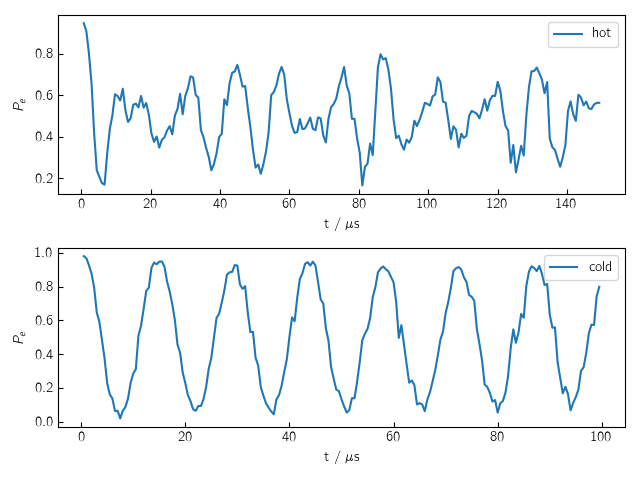

In [206]:
fig, axes = plt.subplots(nrows=2)
for i, n in enumerate(['hot', 'cold']):
    data = np.loadtxt('lecture_BSB_{}.dat'.format(n))
    t = data[:,0] # in microseconds!
    P_g = data[:,1]
    
    axes[i].plot(t, P_g, label=n)
    axes[i].set_xlabel('t / $\mu$s')
    axes[i].set_ylabel('$P_e$')
    axes[i].legend()

fig.tight_layout()

**b)** *(2 Points)* Having at hand the possibility to drive blue- and red-sideband transitions, what other measurement scheme could you use to determine the temperature? Explain the expected signal at the example of very hot and very cold ions.